<html>
<head>
<style>
 <!--
  .centered {
      position: fixed; 
      top: 50%;
      left: 50%;
      transform: translate(-50%, -50%);}
  -->
}
</style>
</head>
<body>
<p><b>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;NAME: GITHIRE WAHOME,
</b></p>
<p><b>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;ASSIGNMENT 4, CS111,
</b></p>
<p><b>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;GRADIENT DESCENT.
</b></p>
</body>
</html>

<html>
<body>
<h3>*IMPORT DATA AND MODULES LOADING...</h3>
</body>
</html>

In [1]:
import matplotlib
import math

%matplotlib inline
data={'X1':[9,8,8,11,12,9,15,20,11,9,10,15,12,8,16,14,16,14,\
            14,17,17,-1,0,-5,-10,-5,-5,1,-10,-15,-10,-8,-8,
            -5,-6,-13,-15,-5,-3,-3,-20,-8,-6,-6,-5,-5,-4,0,-5,-1],
      "X2":[10,7,8,9,10,10,14,22,10,12,19,18,16,24,18,20,12,16,15,22,\
            6,-28,-5,-8,-40,-25,-1,-20,-5,-20,-20,
            -5,-35,-7,-8,-38,-3,-18,-18,-2,-25,-25,-7,-19,-5,-10,-9,\
            0,1,-8],
      "Classification":[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,\
                        1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
                       1,1,1,1,1,1,1,1]}
x1_points =data['X1']
x2_points =data['X2']
# y = mx + b
plt=matplotlib.pyplot
m1,m2,b = 0,0,0
#Functions and PDEs of the loss function wrt to the individual params.
y    = lambda x1,x2:(m1*x1)+(m2*x2)+b
dEm1 = lambda x1,x2,y:-1*((math.e**(m2*x1+b-y*x1*m1)*(y*x1))/\
                        (1+math.e**(-1*(y*x1*m1)+(m2*x2)+b)))
dEm2 = lambda x1,x2,y:((math.e**(m2*x2+b-(y*x1*m1))*(x2))/\
                        (1+math.e**(-1*(y*x1*m1)+(m2*x2)+b)))
dEb  = lambda x1,x2,y:(((math.e**(m2*x1+b-y*x1*m1))/\
                 (1+(math.e**(-1*y*x1*m1+(m2*x2)+b)))))
y_points=data['X2']
def plotData(data):
    colours = ['green', 'red']
    x1=data['X1']
    x2=data['X2']
    x1_values=[min(x1) + float(x)*(max(x1)-min(x1))/len(x1) \
               for x in range(len(x1))]
    x2_values=[min(x2) + float(x)*(max(x2)-min(x2))/len(x2) \
               for x in range(len(x2))]
    y_values = [y(x[0],x[1]) for x in [(x1_values[i],x2_values[i]) \
                                       for i in range(len(x1_values))]]
    plt.plot(x1_values, y_values, 'y')
    return plt.scatter(data['X1'], data['X2'], \
                       c = data['Classification'],\
                cmap= matplotlib.colors.ListedColormap(colours))

x1_points=data['X1']
x2_points=data['X2']

<html>
<body>
<h3>*PLOT DATA...</h3>
</body>
</html>

<html>
<body>
<h3>1.&nbsp; Python Script graphing the data set(Included the starting line to to start with).</h3>
</body>
</html>

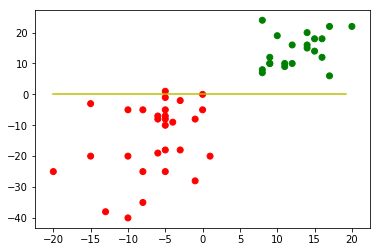

In [2]:
plotData(data)

<html>
<body>
<h3>2.&nbsp; Generalize the code to work for 3 variables..</h3>
</body>
</html>

In [3]:
def summation(x1_points,x2_points, y_values):
    total1 = 0
    total2 = 0
    total3 = 0
    for i in range(1, len(x1_points)):
        #Calculate totals based on the partial derivatives.
        total1 += dEm1(x1_points[i],x2_points[i],y_points[i])
        total2 += dEm2(x2_points[i],x2_points[i],y_points[i])
        total3 += dEb(x2_points[i],x2_points[i],y_points[i])
    #Return their averages, the error function.
    return (total1 / len(x1_points),\
            total2 / len(x2_points),\
            total3 /len(y_points))

<html>
<body>
<h3>3.&nbsp; Implement this error function in python and use gradient descent to find the
classifier..</h3>
</body>
</html>

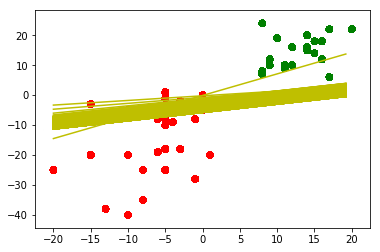

In [4]:
maxIterations=100000
learn = .01
for i in range(maxIterations):
    sum1, sum2,sum3 = summation(x1_points,x2_points,y_points)
    m1 = m1 - learn * sum1
    m2 = m2 - learn * sum2
    b = b - learn * sum3
    #Plot Data to ensure we get 20 reps. 
    di=maxIterations//1000
    if (i%di)==0:
        plotData(data)
plotData(data)

<html>
<body>
<h3>4.&nbsp; How do you interpret the loss function Lf ? When is it big, when it is
small?.</h3>
</body>
</html>

<html>
<body>
<p>The loss function as far as I understood gave us the deviation from the optimal line which we are trying to estimate using our training vetors. </p>
<p>It will be big when the line has the highest deviation fromall the points and is  completely separating them. It wil be least when the regression line we use as a classifier has achieved the best fit thus if convergence happens, it will be least upon convergence.</p>
</body>
</html>

<html>
<body>
<h3>5.&nbsp; What kind of data would not be effectively classified using a support
vector machine (as implemented in this exercise)?.</h3>
</body>
</html>

<html>
<body>
<p>Data that is linearly separable by classifications can be very well classified by this form of linear SVM since the classifications are used to train the SVM.This way, any new data can also be classified along the same criteria. This is the case with our example above. Yes we can achieve the same non linearly separable data but that would require either we keep altering our optimas to find the most favorable points and plot a separation curve but non the less, the separability allows for this. If the data points were completely mixed, SDG SVM we have here would not classify the data effectively. An example of an ineffective case would be clustered data. Think of this, if we were to plot star positions on a sky representing plane, SVMs would nor be effeective since the positions are almost random and if we use say star size as the criteria, thy would almost be homogenious thus will be hard to work with. Going by age or constellation however, we have a good classification criteria that makes some common nebulae stars be clustred together. If we were to use an SVM to classify the stars as per their source cloud, it would be effective as given a position, it is easy to infer where the star is likely to be born and what constellation it belongs to.
</body>
</html>

<html>
<body>
<h3>6.&nbsp; Describe how you might use a support vector machine to build a SPAM
classifier for emails. You do not need to code this up. You will need to decide
how to represent each email as a vector by picking out features (for example
word count, frequency or certain words, mis-spellings, etc.) and then how the
SVM would be used and how gradient descent applies.</h3>
</body>
</html>

<html>
<body>
<p>
We luckily have a lot of spam filter training data in available example the Enron dataset.  To use an SVM to create this,
</p>
<ol>
<li><b>Email Classifier:</b>We can use the email source name and domains, number of shared IPs(When emails are sent enmass, you can easily track how many people it was sent to if you are one of the people it was sent to. Google only recently fixed this bug but yeah, it is possible to track spammers),and finally key words such as 'Loan Forgiveness','Promotions','Find Love'</li>
<li><b>Classification:</b> Iterate through emails received and assigning classification to them. I would use count to track instances of words be it love. In case of the email source name, If the domain is unknown then that would be counted. Basically deepending on whether they cross my threshhold count, After this scan, I will compare an email's score to a threshold value and then classify it as either spam or not spam.</li>
<li><b>Learning:</b>I dont expect to start with an optimal threshold value. Some of my classifications will be wrong and so adjusting my threshold value to achieve better classifications will be key. I expect the user will declassify data from spam sometime and also classify others as spam. If this happens, my filter will rescan the email, see Its scores and alter the original by some minimum value to qualify the email as spam. We can have multiple thresholds for different categorites and as we keep doing this, our filter will get more and more accurate in determing what for us is spam and what is not. </li>
</ol>
</body>
</html>

<html>
<body>
<h3>Optional challenge problem: In your algorithm to learn the SVM incorporate
a graphing feature that draws the line f learned at each step so that you have
a visual demonstration of the algorithm.</h3>
</body>
</html>

<html>
<body>
<p>Implemented in #3 above. The baseline is the initial yellow one at y=0. Then it moves in the direction of the arrow as the estimation gets more accurate.</p>
</body>
</html>